In [1]:
%env OMP_NUM_THREADS=1
%env NUMEXPR_MAX_THREADS=1

import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)
import xarray as xr

from mydedalustools import *
    

env: OMP_NUM_THREADS=1
env: NUMEXPR_MAX_THREADS=1


In [2]:
meter = 1 / 6.37122e6
hour = 1
second = hour / 3600
day = hour*24

In [32]:
%time sol_2l_locked_1day  = open_h5s('snapshots_2l_locked_1day',('s1','s3'))

CPU times: user 4.81 s, sys: 2.94 s, total: 7.75 s
Wall time: 7.94 s


# 1 day radiative time scale

In [33]:
taurad = 1*day
Omega = 2*np.pi/86400 / second 
R = 6400e3 * meter
g = 10*meter/second**2
deltarho_ov_rho1 = 0.1
gprime = g * deltarho_ov_rho1

rho1_ov_rho2 = 1#/(1+deltarho_ov_rho1)
H0 = 1e4*meter
DeltaHeq = 2.4*H0


In [34]:
def uprimerms(u):
    return np.sqrt(((u-u.mean('longitude'))**2).mean('longitude'))/(meter/second)
    

def uprimermsovu(u):
    return np.sqrt(((u-u.mean('longitude'))**2).mean('longitude'))/u.mean('longitude')
    

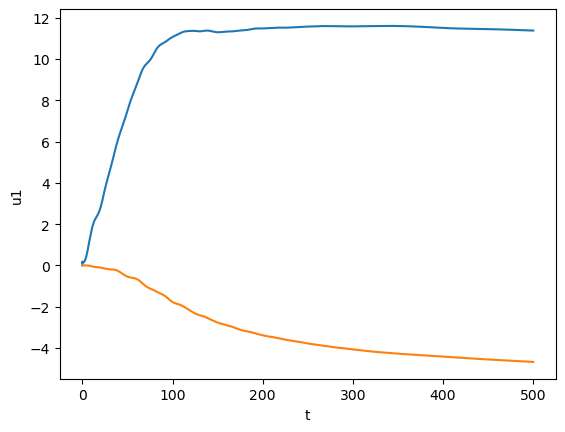

In [35]:
uprimerms(sol_2l_locked_1day.u1[:,0]).mean('latitude').plot()
(sol_2l_locked_1day.u1[:,0].mean(('longitude','latitude'))/(meter/second)).plot()

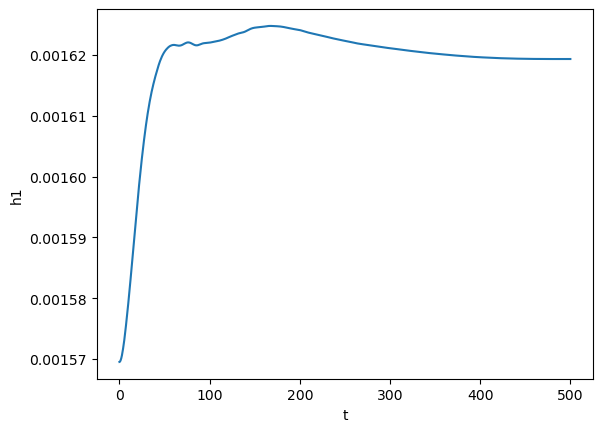

In [36]:
np.sqrt((sol_2l_locked_1day.h1**2).mean(('longitude','latitude'))).plot()

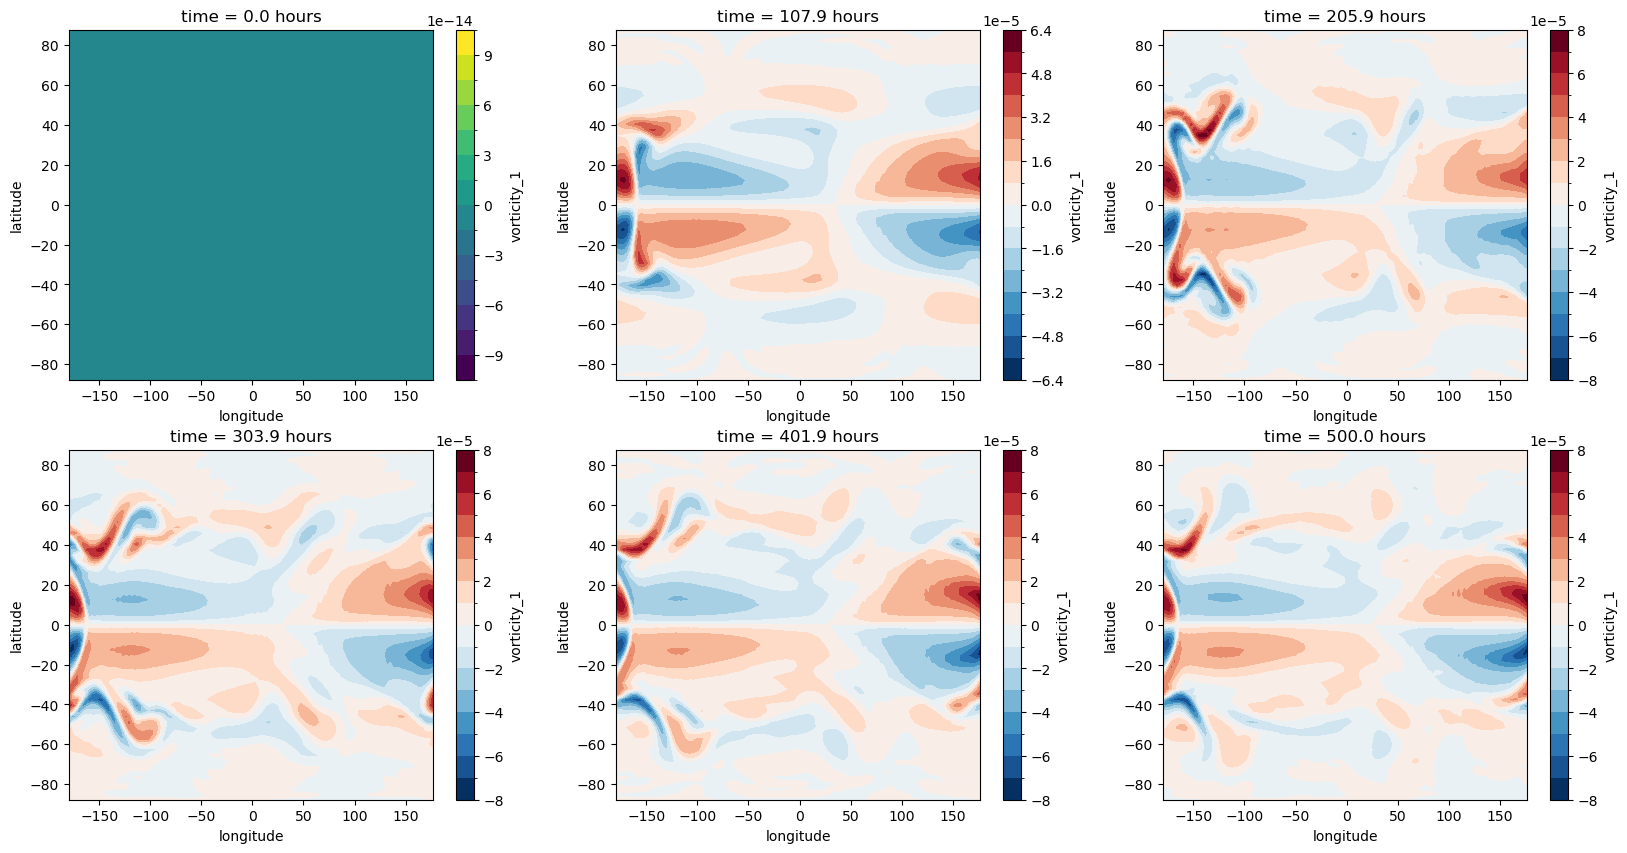

In [37]:
sol=sol_2l_locked_1day
_,axs=plt.subplots(2,3,figsize=(20,10))
axs=axs.reshape(-1)
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    ((sol.vorticity_1[time]-sol.vorticity_1[time].mean('longitude'))*second).plot.contourf(ax=axs[i],levels=18,y='latitude')
    #axs[i].set_xlim(-90,90)
    axs[i].set_title("time = %.1f hours"%sol.t[time])
    

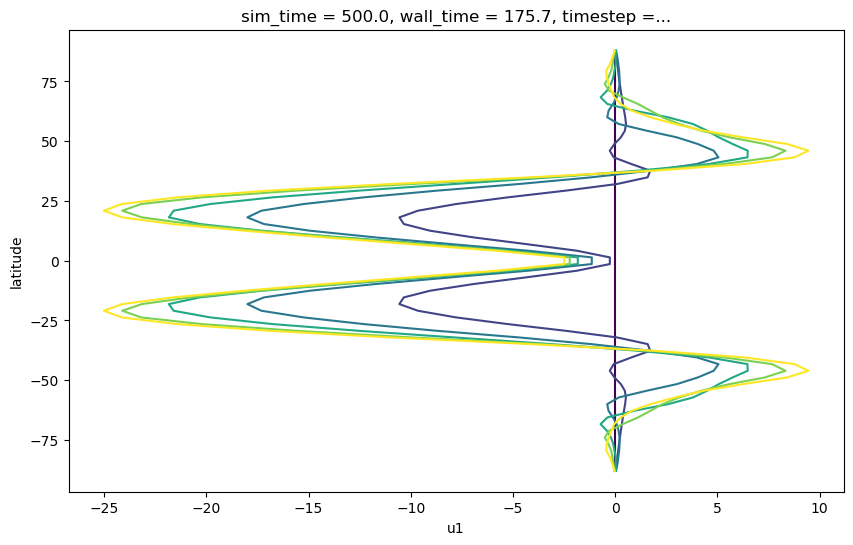

In [38]:
sol=sol_2l_locked_1day
_,ax=plt.subplots(1,1,figsize=(10,6))
colors1 = plt.cm.viridis(np.linspace(0,1,6))
colors2 = plt.cm.plasma(np.linspace(0,1,6))
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    (sol.u1[time,0]/(meter/second)).mean('longitude').plot(ax=ax,y='latitude',color = colors1[i])
    #(sol.u2[time,0]/(meter/second)).mean('longitude').plot(ax=ax,y='latitude',color = colors2[i])
    #axs[i].set_xlim(-90,90)
    #axs[i].set_title("time = %.1f hours"%sol.t[time])
    

/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


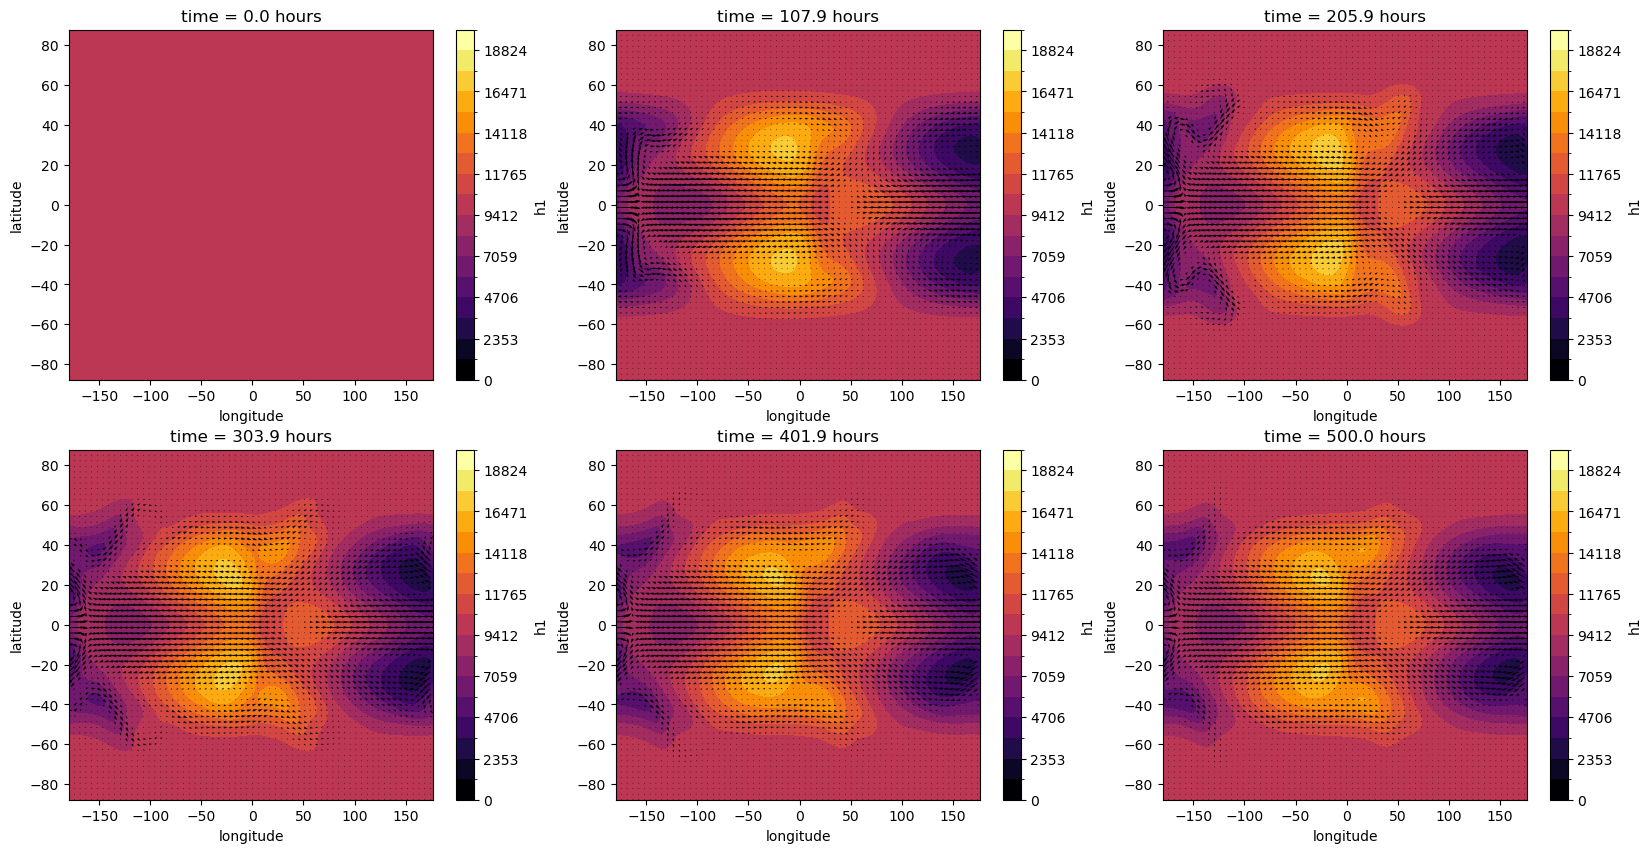

In [39]:
sol=sol_2l_locked_1day
_,axs=plt.subplots(2,3,figsize=(20,10))
axs=axs.reshape(-1)
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    ((sol.h1[time])/meter).plot.contourf(ax=axs[i],y='latitude',levels=18,cmap=plt.cm.inferno,vmin=0,vmax=20e3)
    n=2;m=1
    axs[i].quiver(sol.longitude[::n],
                  sol.latitude[::m] ,
                  sol.u1[time,0][::n,::m].T,
                  -sol.u1[time,1][::n,::m].T)
    #axs[i].set_xlim(-90,90)
    axs[i].set_title("time = %.1f hours"%sol.t[time])
    

/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/global/common/software/m3310/conda/dedalus3/lib/python3.11/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


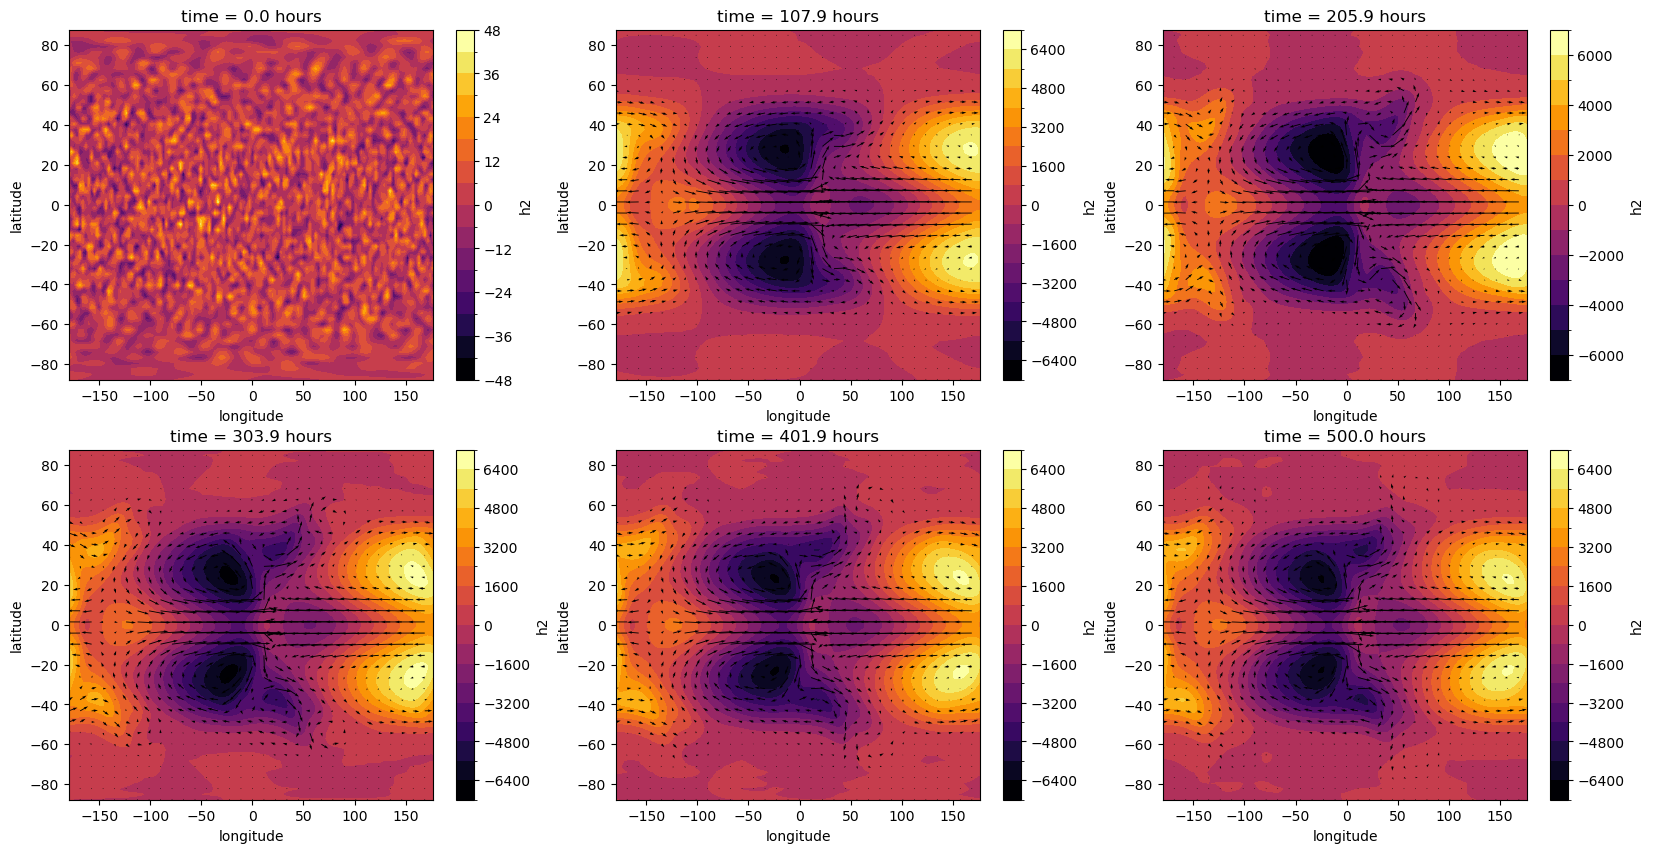

In [40]:
sol=sol_2l_locked_1day
_,axs=plt.subplots(2,3,figsize=(20,10))
axs=axs.reshape(-1)
for i,time in enumerate(np.linspace(0,len(sol.t)-1,6)):
    time=int(time)
    ((sol.h2[time]-sol.h2[time].mean('longitude'))/meter).plot.contourf(ax=axs[i],y='latitude',levels=18,cmap=plt.cm.inferno)
    n=4;m=2
    axs[i].quiver(sol.longitude[::n],
                  sol.latitude[::m] ,
                  (sol.u2[time,0]-sol.u2[time,0].mean('longitude'))[::n,::m].T,
                  -(sol.u2[time,1]-sol.u2[time,1].mean('longitude'))[::n,::m].T)
    #axs[i].set_xlim(-90,90)
    axs[i].set_title("time = %.1f hours"%sol.t[time])
    